In [1]:
import numpy as np
from lab2 import *
from scipy.optimize import fsolve, minimize

In [2]:
# Задаем начальные отнормированные значения количеств хищников и травоядных
x0 = 1
y0 = 1

def model_error(params):
    alpha, beta, gamma, delta = params
    
    # Стационарная точка
    x_s = gamma / delta
    y_s = alpha / beta
    
    # Вычисляем константу
    c = beta * y0 + delta * x0 - alpha * np.log(np.abs(y0)) - gamma * np.log(np.abs(x0))
    
    # Далее, зная константу, можем расчитать минимумы кол-ва травоядных и хищников
    # Для этого будем использовать две вспомогательные функции, корни которых нам нужно найти
    def x_root(x):
        return beta * y_s + delta * x - alpha * np.log(np.abs(y_s)) \
               - gamma * np.log(np.abs(x)) - c
    
    def y_root(y):
        return beta * y + delta * x_s - alpha * np.log(np.abs(y)) \
               - gamma * np.log(np.abs(x_s)) - c

    # Выбираем приближение ближе к осям Ox и Oy для нахождения минимального корня
    x_min = fsolve(x_root, 0.01)
    y_min = fsolve(y_root, 0.01)
    
    return np.abs(y_min / x_min - 1.4)

params = [1.0] * 4
solution = minimize(model_error, params)

In [3]:
alpha, beta, gamma, delta = solution.x
solution

      fun: 1.6274719349951283e-09
 hess_inv: array([[ 2.13537718e-07, -1.17359328e-07,  2.19497711e-07,
        -1.90601994e-07],
       [-1.17359328e-07,  7.03706731e-08, -1.24616356e-07,
         1.05405184e-07],
       [ 2.19497711e-07, -1.24616356e-07,  2.31117995e-07,
        -1.96519060e-07],
       [-1.90601994e-07,  1.05405184e-07, -1.96519059e-07,
         1.71495862e-07]])
      jac: array([1.44290134, 1.39012298, 1.40466066, 1.31292982])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 816
      nit: 5
     njev: 134
   status: 2
  success: False
        x: array([1.18701954, 0.94570093, 1.00919046, 1.10171617])

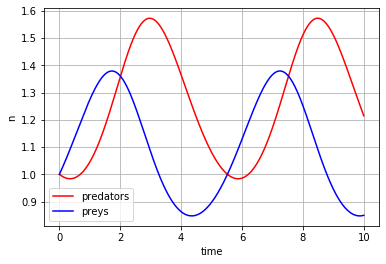

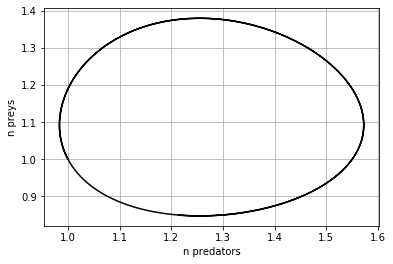

In [4]:
biome = Biome(pred_init = y0, prey_init = x0, tmax = 10, dt=0.0001)
biome.run(alpha, beta, gamma, delta)
# Как можно заметить, модель удовлетворяет критерию и является устойчивой
biome.plot()
biome.plot_cycle()